# Imports


In [118]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [119]:
import numpy as np
from scripts.gaussian.streaming_clusterer import CluStream
from scripts.gaussian.dynamic_clusterer_multidimension import DynamicClusterer
from scripts.utils import get_colors

from river import drift

In [120]:
colors = get_colors()


def import_and_shuffle_csv(file_path, seed=42):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    if seed is not None:
        np.random.seed(seed)

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

In [121]:
# file_path, drift_type = "./data/brightness_data/final_4d_brightness.csv", "BRIGHTNESS-4D"
# file_path, drift_type = "./data/brightness_data/final_8d_brightness.csv", "BRIGHTNESS-8D"
# file_path, drift_type = "./data/brightness_data/final_16d_brightness.csv", "BRIGHTNESS-16D"
# file_path, drift_type = "./data/brightness_data/final_32d_brightness.csv", "BRIGHTNESS-32D"
# file_path, drift_type = "./data/brightness_data/final_64d_brightness.csv", "BRIGHTNESS-64D"
# file_path, drift_type = "./data/brightness_data/final_128d_brightness.csv", "BRIGHTNESS-128D"
# file_path, drift_type = "./data/brightness_data/final_256d_brightness.csv", "BRIGHTNESS-256D"
# file_path, drift_type = "./data/brightness_data/final_512d_brightness.csv", "BRIGHTNESS-512D"
# file_path, drift_type = "./data/brightness_data/full_brightness_embeddings.csv", "BRIGHTNESS-FULL-EMBEDDINGS"

file_path, drift_type = "./data/contrast_data/final_4d_contrast.csv", "CONTRAST-4D"
# file_path, drift_type = "./data/contrast_data/final_8d_contrast.csv", "CONTRAST-8D"
# file_path, drift_type = "./data/contrast_data/final_16d_contrast.csv", "CONTRAST-16D"
# file_path, drift_type = "./data/contrast_data/final_32d_contrast.csv", "CONTRAST-32D"
# file_path, drift_type = "./data/contrast_data/final_64d_contrast.csv", "CONTRAST-64D"
# file_path, drift_type = "./data/contrast_data/final_128d_contrast.csv", "CONTRAST-128D"
# file_path, drift_type = "./data/contrast_data/final_256d_contrast.csv", "CONTRAST-256D"
# file_path, drift_type = "./data/contrast_data/final_512d_contrast.csv", "CONTRAST-512D"
# file_path, drift_type = "./data/contrast_data/full_contrast_embeddings.csv", "CONTRAST-FULL-EMBEDDINGS"

reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [ ]:
def init_dynamic_clusterer(data=reference_data, threshold=2.5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        ax_limit=10,
        phi=100,
        alpha=0.9,
        epsilon=0,
        n_points_per_dimension=500
    )

    return dynamic_clusterer

In [123]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(
    print_graph=False, print_statistics=True, macroclustering_at_end=False
)

New model created - id: 66176
(id: 0)
(id: 1)
timestamp 100 ----> Apply macroclustering <!>

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod0 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)]
overlapping score: 0.5280199252801993

ref0 - center: [np.float64(5.707693001534312), np.float64(5.150806579303515), np.float64(9.261356511242132), np.float64(7.569929252658103)]
prod1 - center: [np.float64(3.15452324155227), np.float64(7.576695180080617), np.float64(10.722913415293645), np.float64(10.727319061660353)]
overlapping score: 0.0

ref1 - center: [np.float64(3.565996066574339), np.float64(7.768456296786395), np.float64(10.614812503033932), np.float64(10.838149732887883)]
prod0 - center: [np.float64(5.2447900665773135), np.float64(4.894559993024761), np.float64(9.14871002114009), np.float64(7.659021300674779)

Creating the directory...
Drawing ...


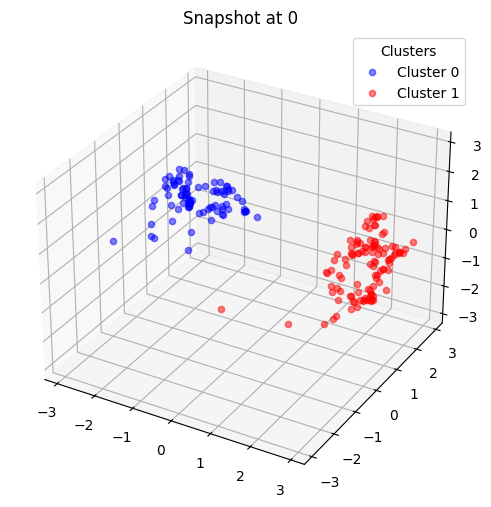

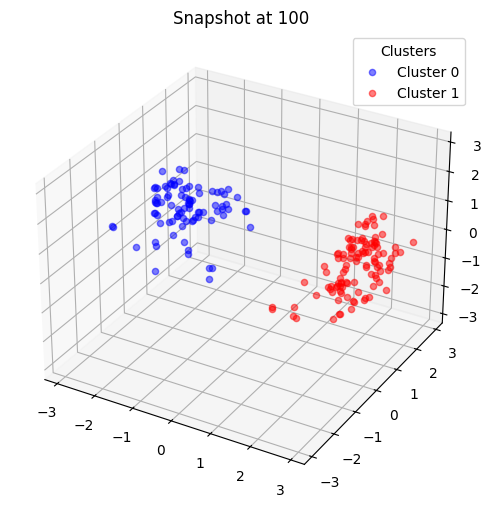

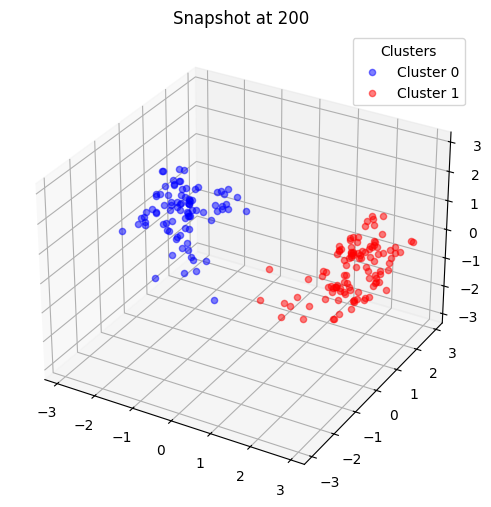

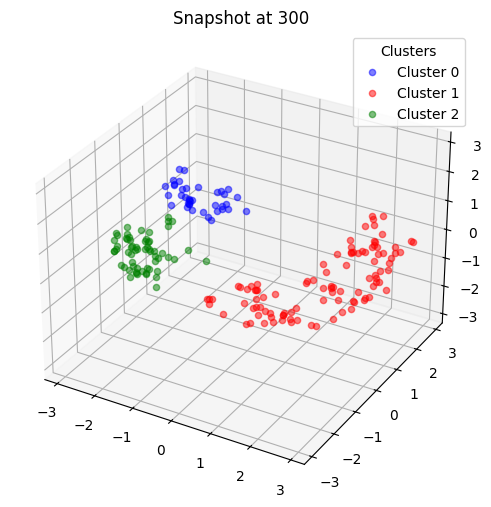

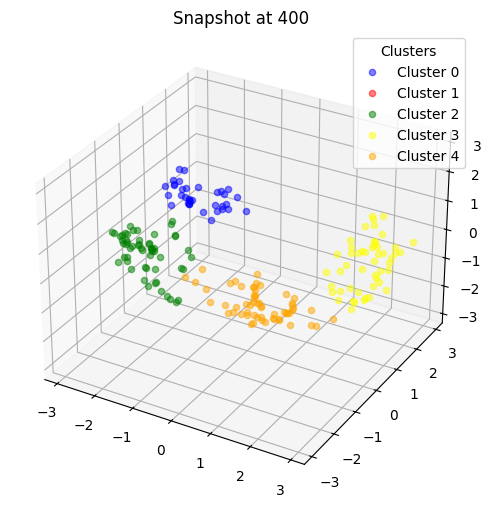

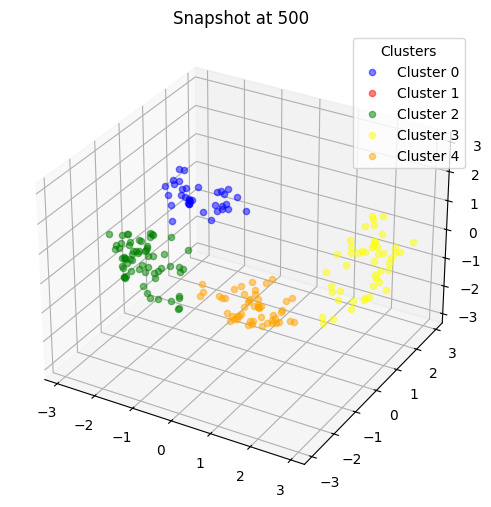

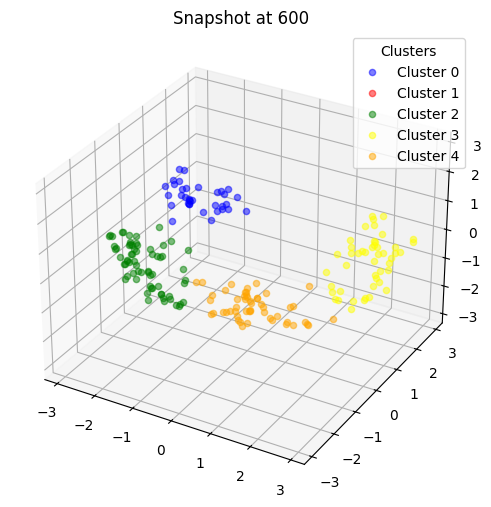

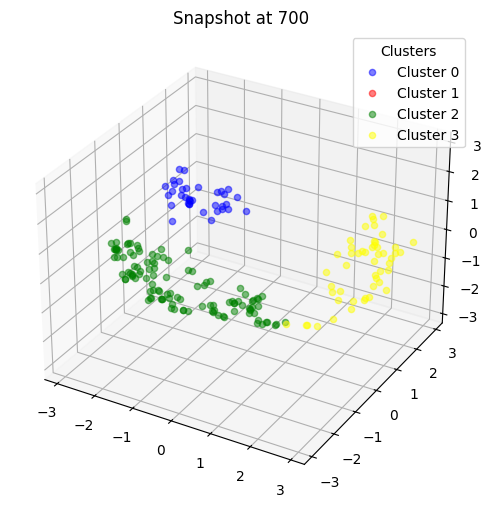

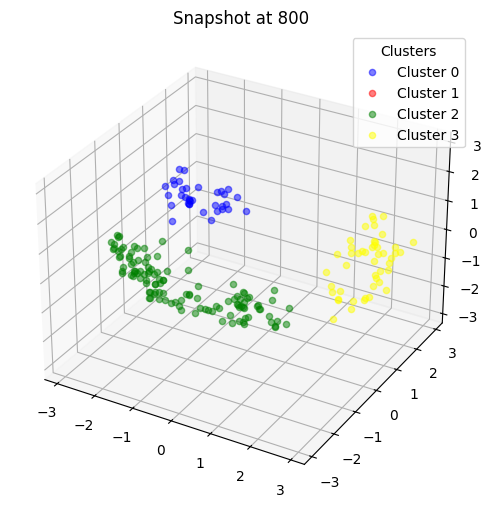

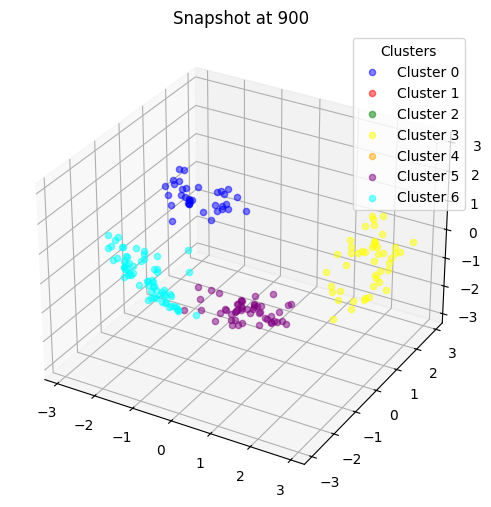

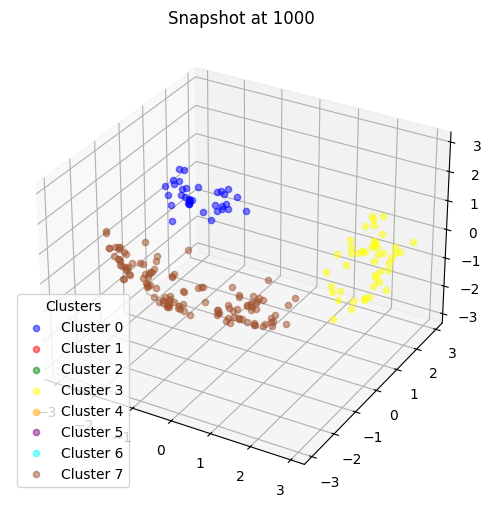

In [125]:
clustream.visualization(dimensions=3, show_image=True, save_gif=True, clean=False)